In [286]:
import numpy as np
import pandas as pd
import csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [287]:
import os
os.getcwd() 
df = pd.read_csv(r"downloads/delay-UA-messy.csv", sep=';')
df.head()



,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DELAY,ARR_DEL15,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,1,2,ORD,DEN,530,716,-35,0,166,137,888
1,1,2,ORD,DEN,1445,1640,-30,0,175,142,888
2,1,2,ORD,DEN,716,904,-26,0,168,138,888
3,1,2,ORD,DEN,1937,2118,-22,0,161,142,888
4,1,2,SFO,DEN,1652,2027,-19,0,155,141,967


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DAY_OF_MONTH         3897 non-null   int64 
 1   DAY_OF_WEEK          3897 non-null   int64 
 2   ORIGIN               3897 non-null   object
 3   DEST                 3897 non-null   object
 4   CRS_DEP_TIME         3897 non-null   int64 
 5   CRS_ARR_TIME         3897 non-null   int64 
 6   ARR_DELAY            3897 non-null   int64 
 7   ARR_DEL15            3897 non-null   int64 
 8   CRS_ELAPSED_TIME     3897 non-null   int64 
 9   ACTUAL_ELAPSED_TIME  3897 non-null   int64 
 10  DISTANCE             3897 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 335.0+ KB


In [289]:
df.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DELAY,ARR_DEL15,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
count,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000
mean,16.316397,3.833718,1290.279189,1483.204003,16.257891,0.271747,195.208622,185.447524,1210.371311
std,8.902144,1.932262,495.277168,533.341270,67.256367,0.444918,51.891678,53.036976,412.897339
min,1.000000,1.000000,7.000000,1.000000,-56.000000,0.000000,132.000000,113.000000,862.000000
25%,9.000000,2.000000,905.000000,1142.000000,-15.000000,0.000000,155.000000,143.000000,888.000000
50%,17.000000,4.000000,1252.000000,1523.000000,-4.000000,0.000000,168.000000,161.000000,967.000000
75%,24.000000,5.000000,1702.000000,1912.000000,19.000000,1.000000,252.000000,234.000000,1635.000000
max,31.000000,7.000000,2359.000000,2359.000000,1069.000000,1.000000,308.000000,365.000000,1846.000000


In [290]:
x = sorted(df["ARR_DELAY"], reverse=True)
x[:30]




[1069,
 1019,
 1008,
 951,
 808,
 477,
 450,
 450,
 447,
 445,
 442,
 438,
 416,
 405,
 395,
 393,
 389,
 377,
 374,
 366,
 362,
 354,
 336,
 333,
 325,
 324,
 323,
 322,
 315,
 311]

In [291]:
y=sorted(df["ARR_DELAY"])
y[:30]

[-56,
 -53,
 -51,
 -48,
 -45,
 -44,
 -43,
 -43,
 -42,
 -42,
 -41,
 -41,
 -41,
 -41,
 -41,
 -40,
 -40,
 -40,
 -40,
 -40,
 -39,
 -39,
 -38,
 -38,
 -38,
 -38,
 -38,
 -38,
 -37,
 -37]

In [292]:
df.duplicated().unique()

array([False])

In [293]:
df.ORIGIN.unique()

array(['ORD', 'SFO', 'IAH', 'DEN'], dtype=object)

In [294]:
df.DEST.unique()

array(['DEN', 'IAH', 'ORD', 'SFO'], dtype=object)

In [295]:
df.ARR_DEL15.unique()

array([0, 1])

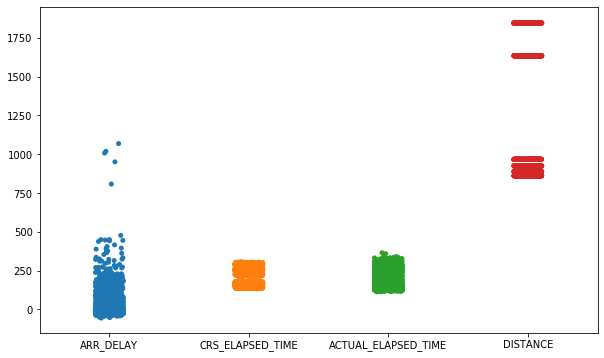

In [296]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df[["ARR_DELAY", "CRS_ELAPSED_TIME", "ACTUAL_ELAPSED_TIME", "DISTANCE"]])
plt.show()

In [297]:
df

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DELAY,ARR_DEL15,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,1,2,ORD,DEN,530,716,-35,0,166,137,888
1,1,2,ORD,DEN,1445,1640,-30,0,175,142,888
2,1,2,ORD,DEN,716,904,-26,0,168,138,888
3,1,2,ORD,DEN,1937,2118,-22,0,161,142,888
4,1,2,SFO,DEN,1652,2027,-19,0,155,141,967
...,...,...,...,...,...,...,...,...,...,...,...
3892,31,4,IAH,SFO,1540,1804,20,1,264,243,1635
3893,31,4,IAH,SFO,1031,1304,35,1,273,252,1635
3894,31,4,ORD,SFO,905,1142,70,1,277,264,1846
3895,31,4,IAH,SFO,1143,1406,81,1,263,241,1635


In [298]:
df.groupby(["ORIGIN", "DEST"]).mean()["ARR_DELAY"]

ORIGIN  DEST
DEN     IAH     13.276657
        ORD      8.989865
        SFO     26.896321
IAH     DEN      8.375000
        ORD      7.029412
        SFO     29.968750
ORD     DEN     16.712460
        IAH     11.984227
        SFO     21.105134
SFO     DEN     14.992908
        IAH     19.292683
        ORD     17.182045
Name: ARR_DELAY, dtype: float64

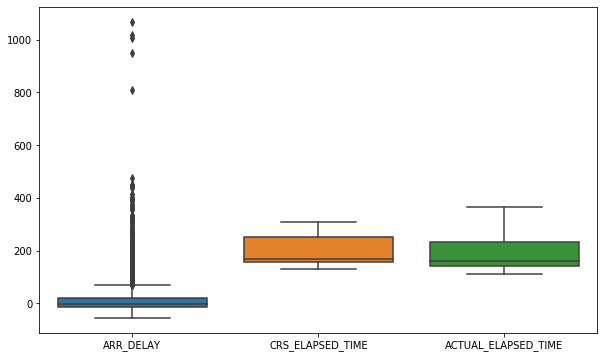

In [299]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["ARR_DELAY","CRS_ELAPSED_TIME", "ACTUAL_ELAPSED_TIME"]])
plt.show()

In [300]:
import os
os.getcwd() 
df_clean = pd.read_csv(r"downloads/delay-UA-CLEANED.csv", sep=';')
df_clean.head()


,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DELAY,ARR_DEL15,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,31,4,SFO,DEN,1418,1758,-31,0,160,137,967
1,31,4,DEN,IAH,1601,1926,9,0,145,134,862
2,31,4,ORD,DEN,1600,1748,36,1,168,155,888
3,31,4,ORD,SFO,1241,1531,7,0,290,291,1846
4,31,4,IAH,SFO,1852,2114,-6,0,262,250,1635


In [301]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DAY_OF_MONTH         3900 non-null   int64 
 1   DAY_OF_WEEK          3900 non-null   int64 
 2   ORIGIN               3900 non-null   object
 3   DEST                 3900 non-null   object
 4   CRS_DEP_TIME         3900 non-null   int64 
 5   CRS_ARR_TIME         3900 non-null   int64 
 6   ARR_DELAY            3900 non-null   int64 
 7   ARR_DEL15            3900 non-null   int64 
 8   CRS_ELAPSED_TIME     3900 non-null   int64 
 9   ACTUAL_ELAPSED_TIME  3900 non-null   int64 
 10  DISTANCE             3900 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 335.3+ KB


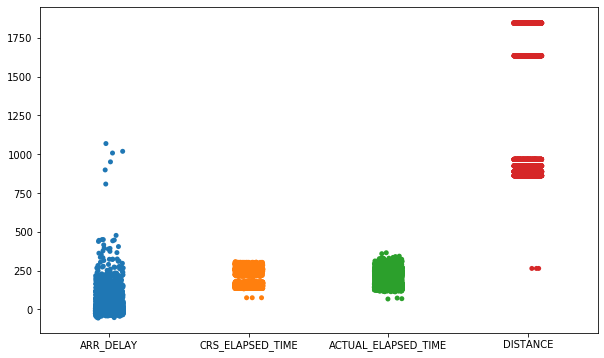

In [302]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_clean[["ARR_DELAY", "CRS_ELAPSED_TIME", "ACTUAL_ELAPSED_TIME", "DISTANCE"]])
plt.show()

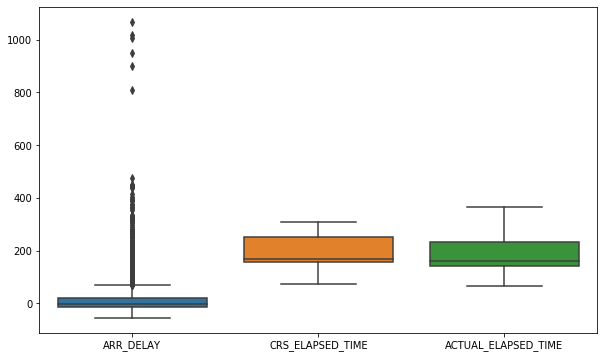

In [303]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean[["ARR_DELAY","CRS_ELAPSED_TIME", "ACTUAL_ELAPSED_TIME"]])
plt.show()